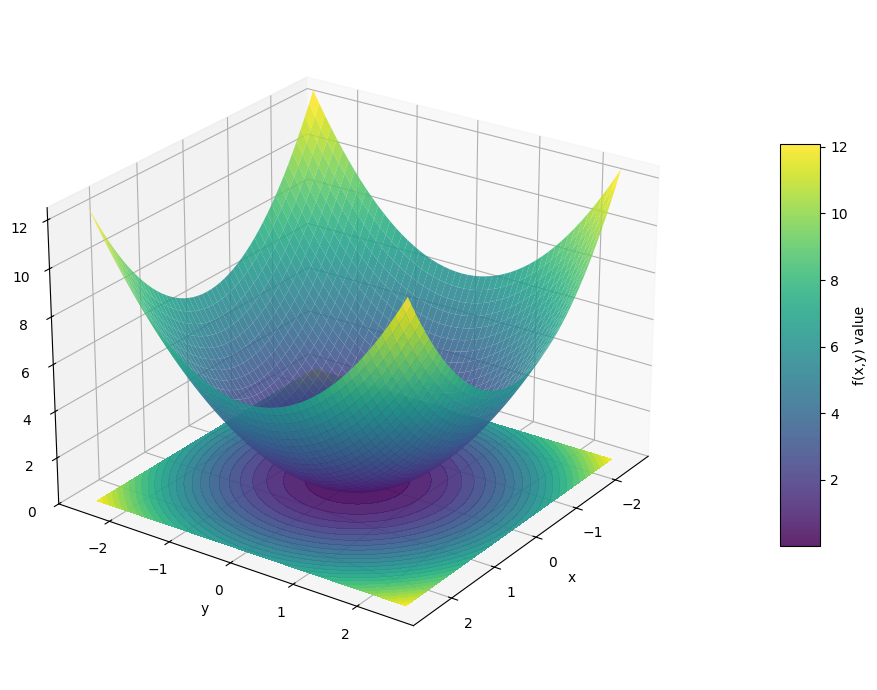

In [1]:
# ==========================================
# Fancy 3D surface with coloured contour projection
# Function: z = x^2 + y^2
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# --- Create data grid ---
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# --- Create figure and axis ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# --- Plot the surface ---
surf = ax.plot_surface(
    X, Y, Z,
    cmap="viridis",
    edgecolor="none",
    alpha=0.85
)

# --- Add a filled contour projection on the xy-plane (z=0) ---
contour = ax.contourf(
    X, Y, Z,
    zdir='z',
    offset=0,
    cmap="viridis",
    levels=30,
    alpha=0.9
)

# --- Add a colour bar ---
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, pad=0.1, label="f(x,y) value")

# --- Axes and view ---
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=25, azim=35)
ax.set_zlim(0, Z.max())

plt.tight_layout()
fig.savefig("gradient_surface_with_coloured_contours.png", dpi=300, bbox_inches="tight")
fig.savefig("gradient_surface_with_coloured_contours.pdf", bbox_inches="tight")
plt.show()


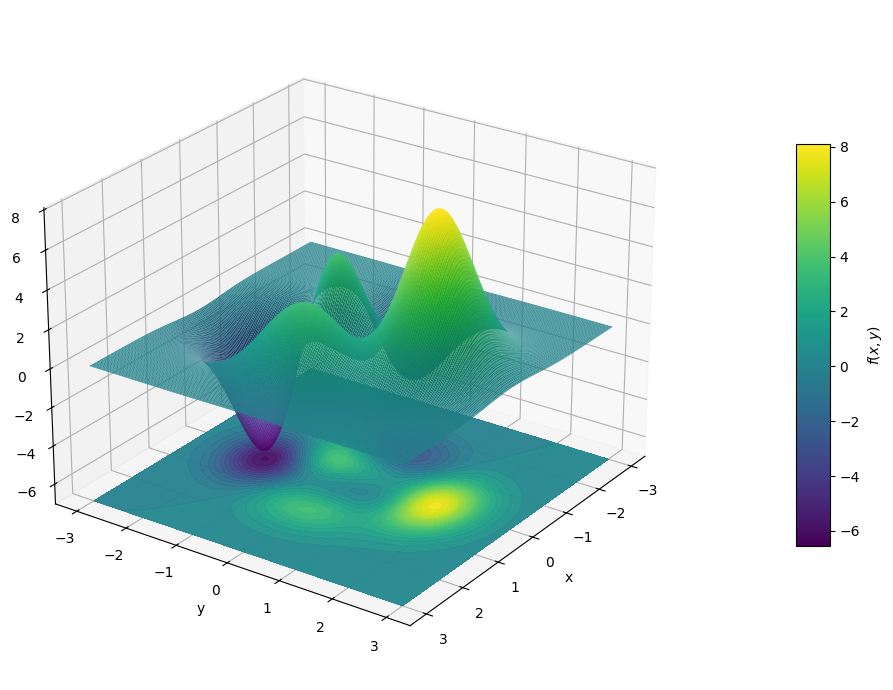

In [3]:
# =====================================================
# Beautiful 3D surface illustration for multivariable calculus
# Function: Peaks-style surface with coloured contour projection
# Saves output to ./figures/
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import os

# -----------------------------------------------------
# Ensure output folder exists
# -----------------------------------------------------
os.makedirs("figures", exist_ok=True)

# -----------------------------------------------------
# Define the surface function (similar to MATLAB's peaks)
# -----------------------------------------------------
def peaks(x, y):
    return (
        3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - (1 / 3) * np.exp(-(x + 1)**2 - y**2)
    )

# -----------------------------------------------------
# Create grid data
# -----------------------------------------------------
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

# -----------------------------------------------------
# Create the 3D figure and lighting effect
# -----------------------------------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Add light source for shading (gives nice depth)
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(Z, cmap=plt.get_cmap("viridis"), vert_exag=0.8, blend_mode="soft")

# -----------------------------------------------------
# Plot the main surface
# -----------------------------------------------------
surf = ax.plot_surface(
    X, Y, Z,
    rstride=2, cstride=2,           # mesh stride
    facecolors=rgb,                 # shaded colours
    linewidth=0,
    antialiased=True,
    shade=False                     # shading handled by LightSource
)

# -----------------------------------------------------
# Add a filled contour projection on the xy-plane
# -----------------------------------------------------
zmin = Z.min() - 0.5
ax.contourf(
    X, Y, Z,
    zdir="z", offset=zmin,
    levels=30,
    cmap="viridis",
    alpha=0.95
)

# -----------------------------------------------------
# Add colour bar
# -----------------------------------------------------
mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(Z)
fig.colorbar(
    mappable, ax=ax,
    shrink=0.6, aspect=12, pad=0.12,
    label=r"$f(x, y)$"
)

# -----------------------------------------------------
# Axis labels, limits, and camera angle
# -----------------------------------------------------
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=25, azim=35)
ax.set_zlim(zmin, Z.max())

plt.tight_layout()

# -----------------------------------------------------
# Save as high-quality images in ./figures/
# -----------------------------------------------------
fig.savefig("figure/cool_surface_with_coloured_contours.png", dpi=300, bbox_inches="tight")
plt.show()


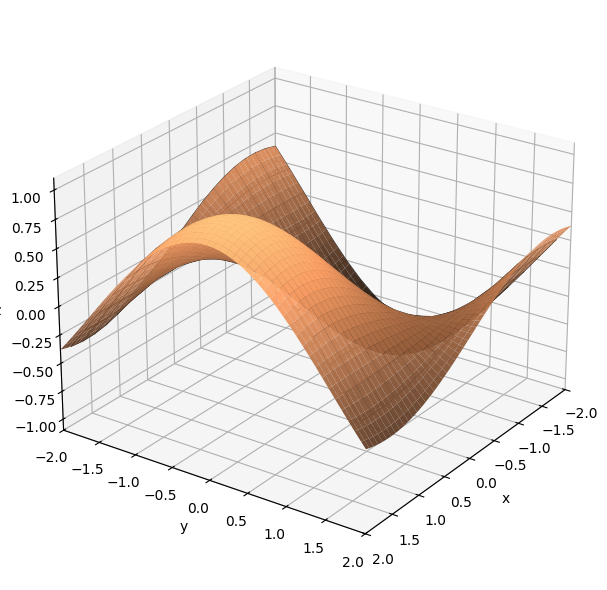

In [4]:
# Golden 3D surface with wireframe (Mathematica-like look)
# z = sin(x) * cos(y) on [-2, 2] x [-2, 2]

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import os

os.makedirs("figures", exist_ok=True)

# Grid
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)

# Surface function
Z = np.sin(X) * np.cos(Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Warm gold-brown surface
surf = ax.plot_surface(
    X, Y, Z,
    cmap="copper",
    linewidth=0,
    antialiased=True,
    alpha=0.95
)

# Overlay sparse black wireframe (for the grid look)
skip = 10
ax.plot_wireframe(
    X[::skip, ::skip], Y[::skip, ::skip], Z[::skip, ::skip],
    rstride=1, cstride=1, color="black", linewidth=0.6, alpha=0.8
)

# View and axes
ax.view_init(elev=25, azim=35)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1.1, 1.1)

plt.tight_layout()
fig.savefig("figure/golden_surface_wireframe.png", dpi=300, bbox_inches="tight")
plt.show()


Saved domain_axes_on_top.png in /figure/


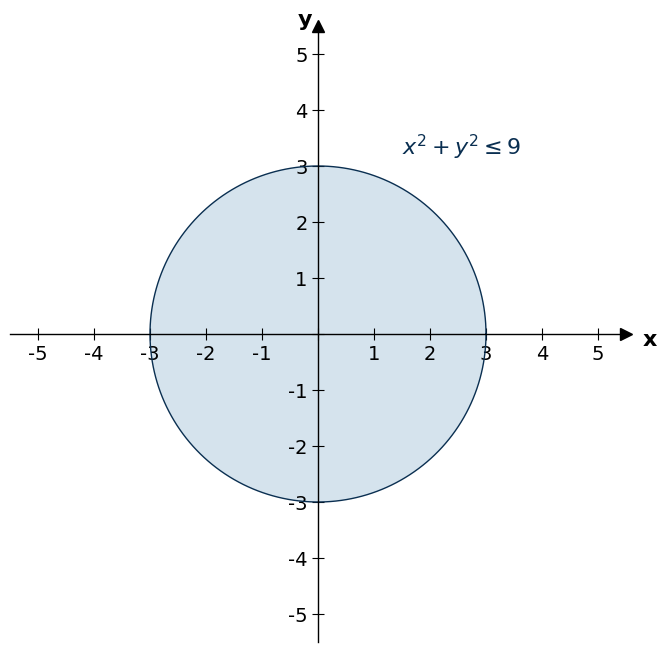

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Create the output folder if it doesn't exist
os.makedirs("figure", exist_ok=True)

# --- Colors matched from the example image ---
# A deep navy blue for the border and text
viaDarkBlue = "#0A2F51" 
# The light blue-gray for the fill
viaLightBlue = "#D5E3ED" 

# ============================================================
#       DOMAIN FIGURE WITH AXES ON TOP (Corrected)
# ============================================================

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 8))

# --- Plot the Domain with a low zorder ---
# The filled disk. A low zorder (e.g., 1) places it in the background.
disk = patches.Circle((0, 0), 3, facecolor=viaLightBlue, edgecolor='none', zorder=1)
ax.add_patch(disk)

# The boundary circle. zorder=2 places it above the disk but still behind the axes.
theta = np.linspace(0, 2 * np.pi, 400)
x_circle = 3 * np.cos(theta)
y_circle = 3 * np.sin(theta)
ax.plot(x_circle, y_circle, color=viaDarkBlue, linewidth=1, zorder=2)

# --- Configure Axes and Ticks ---
# Set plot limits
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Move the left and bottom spines to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# The axes spines and ticks have a higher default zorder, so they will now
# automatically be drawn on top of the circle and disk.
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Set the major ticks for both axes
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=14, direction='inout', length=8)

# Remove the '0' label at the origin
ax.set_xticklabels([int(x) if x != 0 else '' for x in ax.get_xticks()])
ax.set_yticklabels([int(y) if y != 0 else '' for y in ax.get_yticks()])

# --- Add Arrowheads and Axis Labels ---
# These are plotted on top by default
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=8)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=8)

# Add bold 'x' and 'y' labels
ax.text(5.8, -0.1, 'x', fontsize=16, va='center', ha='left', weight='bold')
ax.text(-0.1, 5.8, 'y', fontsize=16, va='top', ha='right', weight='bold')

# --- Add the Formula Text ---
ax.text(1.5, 3.2, r"$x^2 + y^2 \leq 9$", fontsize=16, color=viaDarkBlue)

# Ensure the plot is a perfect circle
ax.set_aspect('equal')

# --- Save the Figure ---
fig.savefig("figure/domain.png", dpi=300, bbox_inches="tight")

print("Saved domain_axes_on_top.png in /figure/")

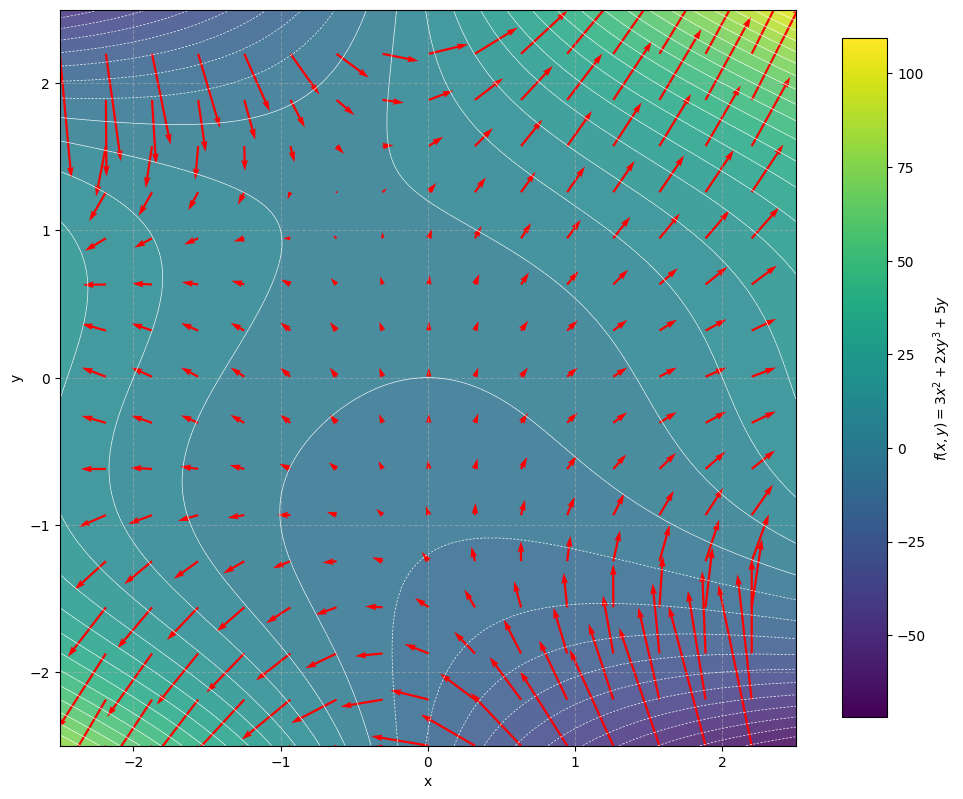

In [15]:
# =====================================================
# 2D Contour Plot with Gradient Vectors
# Function: f(x, y) = 3x^2 + 2xy^3 + 5y
# Saves output to ./figures/
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
import os

# -----------------------------------------------------
# Ensure output folder exists
# -----------------------------------------------------
os.makedirs("figure", exist_ok=True)

# -----------------------------------------------------
# Define the function and its gradient
# -----------------------------------------------------
def f(x, y):
    """The scalar function f(x, y)."""
    return 3*x**2 + 2*x*y**3 + 5*y

def grad_f(x, y):
    """The gradient of f(x, y)."""
    df_dx = 6*x + 2*y**3
    df_dy = 6*x*y**2 + 5
    return df_dx, df_dy

# -----------------------------------------------------
# Create grid data
# -----------------------------------------------------
x = np.linspace(-2.5, 2.5, 400)
y = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# -----------------------------------------------------
# Create a sparser grid for the gradient vectors
# This prevents the plot from being too cluttered
# -----------------------------------------------------
skip = 25  # Plot one arrow every 25 grid points
X_quiver = X[::skip, ::skip]
Y_quiver = Y[::skip, ::skip]
U, V = grad_f(X_quiver, Y_quiver)

# -----------------------------------------------------
# Create the 2D figure
# -----------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# -----------------------------------------------------
# Plot the filled contours and contour lines
# -----------------------------------------------------
contourf = ax.contourf(X, Y, Z, levels=30, cmap="viridis", alpha=0.85)
contours = ax.contour(X, Y, Z, levels=contourf.levels, colors="white", linewidths=0.5)

# -----------------------------------------------------
# Plot the gradient vectors using a quiver plot
# -----------------------------------------------------
ax.quiver(X_quiver, Y_quiver, U, V, color="red", scale=400, width=0.003)

# -----------------------------------------------------
# Add colour bar
# -----------------------------------------------------
mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(Z)
fig.colorbar(
    mappable, ax=ax,
    shrink=0.7, aspect=15,
    label=r"$f(x, y) = 3x^2 + 2xy^3 + 5y$"
)

# -----------------------------------------------------
# Axis labels, limits, and aspect ratio
# -----------------------------------------------------
ax.set_xlabel("x")
ax.set_ylabel("y")
# set_aspect('equal') is crucial for angles to look perpendicular
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# -----------------------------------------------------
# Save as a high-quality image in ./figures/
# -----------------------------------------------------
fig.savefig("figure/contour_with_gradients.png", dpi=300, bbox_inches="tight")
plt.show()

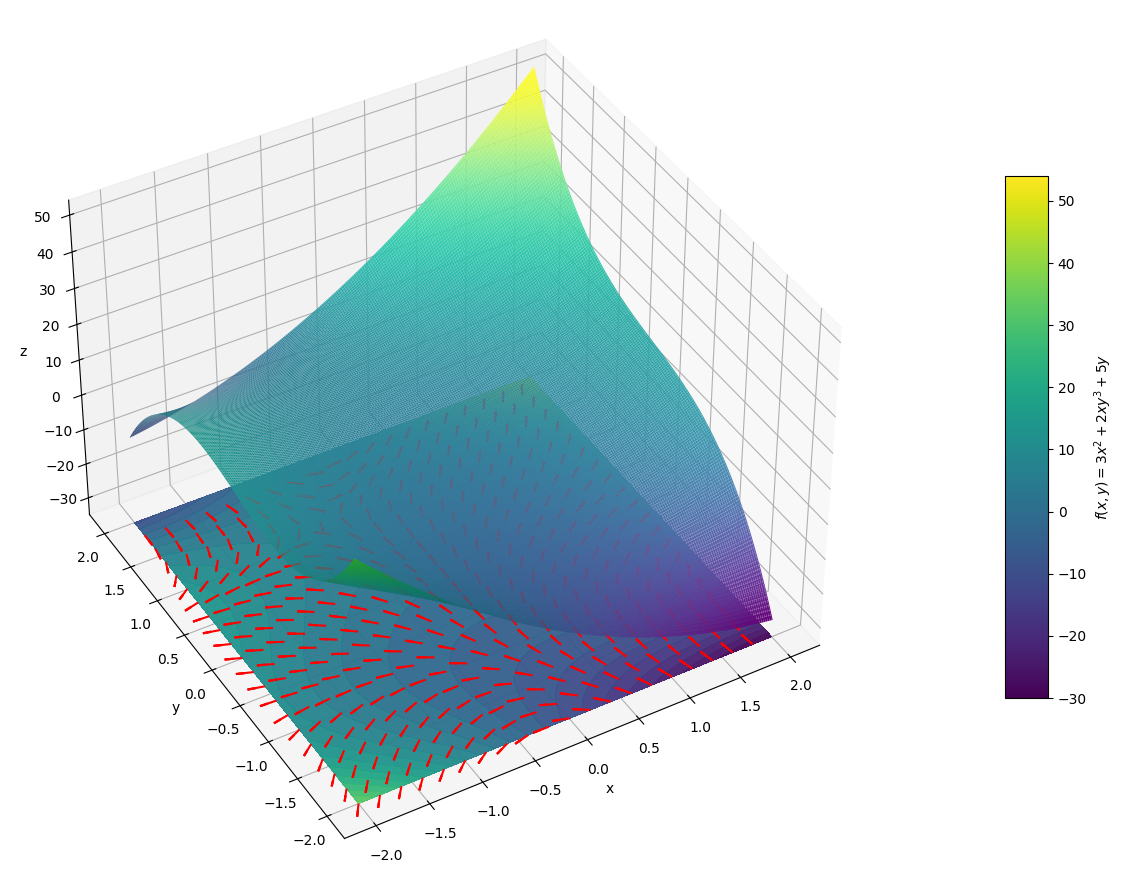

In [16]:
# =====================================================
# 3D surface with projected contours and gradient vectors
# Function: f(x, y) = 3x^2 + 2xy^3 + 5y
# Saves output to ./figures/
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import os

# -----------------------------------------------------
# Ensure output folder exists
# -----------------------------------------------------
os.makedirs("figure", exist_ok=True)

# -----------------------------------------------------
# Define the function and its gradient
# -----------------------------------------------------
def f(x, y):
    """The scalar function f(x, y)."""
    return 3*x**2 + 2*x*y**3 + 5*y

def grad_f(x, y):
    """The gradient of f(x, y)."""
    df_dx = 6*x + 2*y**3
    df_dy = 6*x*y**2 + 5
    return df_dx, df_dy

# -----------------------------------------------------
# Create grid data
# -----------------------------------------------------
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# -----------------------------------------------------
# Create a sparser grid for the gradient vectors
# to avoid cluttering the plot.
# -----------------------------------------------------
skip = 20  # Plot one arrow every 20 grid points
X_quiver = X[::skip, ::skip]
Y_quiver = Y[::skip, ::skip]
U, V = grad_f(X_quiver, Y_quiver)

# -----------------------------------------------------
# Create the 3D figure and lighting effect
# -----------------------------------------------------
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")

# Add light source for shading (gives nice depth)
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(Z, cmap=plt.get_cmap("viridis"), vert_exag=0.8, blend_mode="soft")

# -----------------------------------------------------
# Plot the main surface
# -----------------------------------------------------
surf = ax.plot_surface(
    X, Y, Z,
    rstride=2, cstride=2,           # Mesh stride
    facecolors=rgb,                 # Shaded colours
    linewidth=0,
    antialiased=True,
    shade=False                     # Shading handled by LightSource
)

# -----------------------------------------------------
# Add a filled contour projection on the xy-plane
# -----------------------------------------------------
zmin = Z.min() - 5 # Adjust offset for better visibility
contourf = ax.contourf(
    X, Y, Z,
    zdir="z", offset=zmin,
    levels=30,
    cmap="viridis",
    alpha=0.95
)

# Also add contour lines for clarity
ax.contour(
    X, Y, Z,
    zdir="z", offset=zmin,
    levels=contourf.levels,
    colors="white",
    linewidths=0.5
)

# -----------------------------------------------------
# Add the gradient vectors (quiver plot) on the projection
# -----------------------------------------------------
# Z component for quiver positions and vectors are zero
Z_quiver = np.full_like(X_quiver, zmin)
W_quiver = np.zeros_like(U)

# Normalize vectors for uniform length to show direction clearly
norms = np.sqrt(U**2 + V**2)
# Avoid division by zero for zero-length vectors
U_norm = np.divide(U, norms, out=np.zeros_like(U), where=norms!=0)
V_norm = np.divide(V, norms, out=np.zeros_like(V), where=norms!=0)

ax.quiver(
    X_quiver, Y_quiver, Z_quiver,
    U_norm, V_norm, W_quiver,
    color='red',
    length=0.15, # Controls the displayed length of the arrows
    arrow_length_ratio=0.5
)

# -----------------------------------------------------
# Add colour bar
# -----------------------------------------------------
mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(Z)
fig.colorbar(
    mappable, ax=ax,
    shrink=0.6, aspect=12, pad=0.12,
    label=r"$f(x, y) = 3x^2 + 2xy^3 + 5y$"
)

# -----------------------------------------------------
# Axis labels, limits, and camera angle
# -----------------------------------------------------
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=40, azim=240) # Adjusted camera angle for better view
ax.set_zlim(zmin, Z.max())

plt.tight_layout()

# -----------------------------------------------------
# Save as high-quality images in ./figures/
# -----------------------------------------------------
fig.savefig("figure/surface_with_projected_gradients.png", dpi=300, bbox_inches="tight")
plt.show()

--- Gradient Descent Finished ---
Learned beta_0 (intercept): 1.0082
Learned beta_1 (slope):     1.9546
(The true values were beta_0 = 1 and beta_1 = 2)


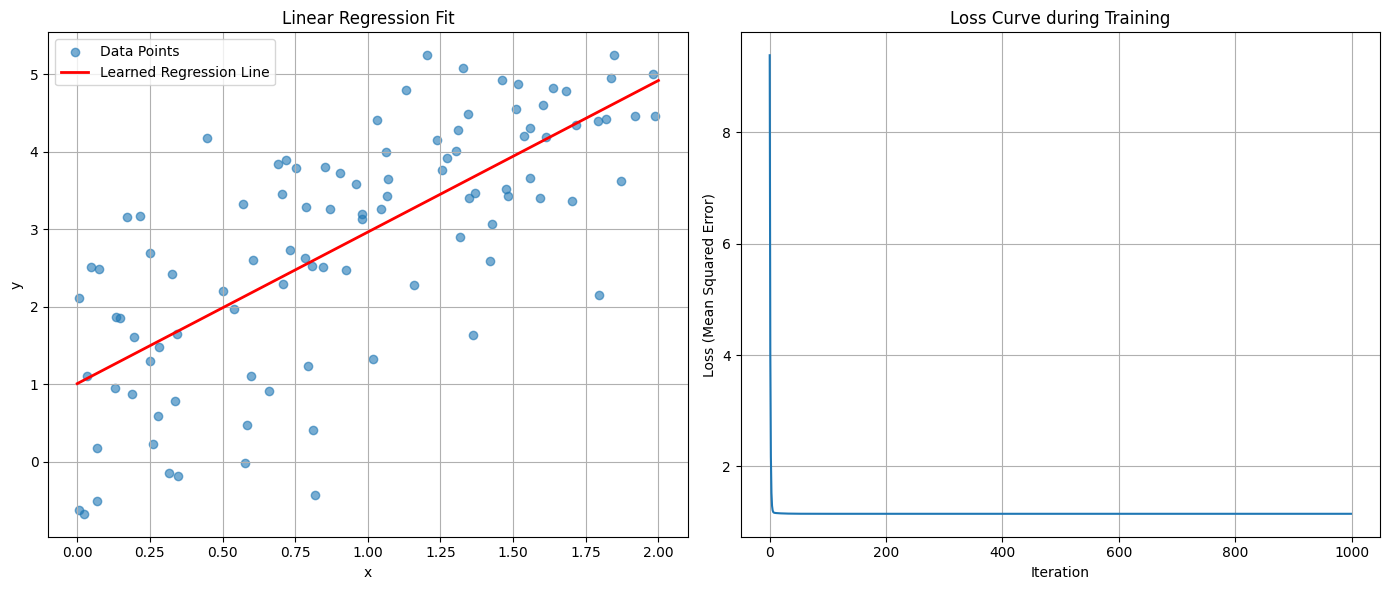

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some sample data that looks like a line with noise
# We'll aim to find a line that fits this data.
# The "true" line is y = 1 + 2x. Let's see if our algorithm can find it.
X = 2 * np.random.rand(100, 1)  # 100 random numbers between 0 and 2
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + Gaussian noise

# 2. Initialize the model's parameters (beta_0 and beta_1)
# We start with random guesses for our slope and intercept.
beta_0 = np.random.randn()
beta_1 = np.random.randn()

# 3. Define the learning rate and number of iterations
# The learning rate (eta) is a small number that controls the step size.
learning_rate = 0.1
n_iterations = 1000

# We need n for our formulas (the number of data points)
n = len(X)

# A list to store the loss at each iteration, so we can plot it
loss_history = []

# 4. The Gradient Descent Loop
for iteration in range(n_iterations):
    # Step 4a: Make predictions with the current parameters
    # This is the line equation: y_hat = beta_0 + beta_1 * x
    y_pred = beta_0 + beta_1 * X

    # Step 4b: Calculate the loss (Mean Squared Error)
    # This is just for tracking our progress.
    loss = (1/n) * np.sum((y - y_pred)**2)
    loss_history.append(loss)

    # Step 4c: Calculate the partial derivatives (the gradient)
    # These are the formulas we derived mathematically.
    d_beta_0 = (-2/n) * np.sum(y - y_pred)
    d_beta_1 = (-2/n) * np.sum((y - y_pred) * X)

    # Step 4d: Update the parameters
    # This is the "downhill" step, moving opposite to the gradient.
    beta_0 = beta_0 - learning_rate * d_beta_0
    beta_1 = beta_1 - learning_rate * d_beta_1

# 5. Print the final, learned parameters
print("--- Gradient Descent Finished ---")
print(f"Learned beta_0 (intercept): {beta_0:.4f}")
print(f"Learned beta_1 (slope):     {beta_1:.4f}")
print("(The true values were beta_0 = 1 and beta_1 = 2)")


# 6. Plot the results
plt.figure(figsize=(14, 6))

# Plot 1: The regression line fit
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6, label="Data Points")
# To plot the line, create two points from the learned parameters
x_line = np.array([0, 2])
y_line = beta_0 + beta_1 * x_line
plt.plot(x_line, y_line, "r-", linewidth=2, label="Learned Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)

# Plot 2: The loss curve
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Loss Curve during Training")
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate the same sample data
# The "true" line is y = 1 + 2x.
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# 2. Create and train the Linear Regression model
# The core of the library: create an instance of the model.
model = LinearRegression()

# The .fit() method is where all the work happens. Scikit-learn
# finds the optimal parameters that minimize the MSE loss function.
model.fit(X, y)

# 3. Retrieve the learned parameters
# The parameters are stored in object attributes after fitting.
# The intercept is beta_0, and the coefficient is beta_1.
learned_beta_0 = model.intercept_
learned_beta_1 = model.coef_[0] # .coef_ is an array, so we take the first element

# 4. Print the final, learned parameters
print("--- Scikit-learn Training Finished ---")
print(f"Learned beta_0 (intercept): {learned_beta_0[0]:.4f}")
print(f"Learned beta_1 (slope):     {learned_beta_1:.4f}")
print("(The true values were beta_0 = 1 and beta_1 = 2)")


# 5. Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label="Data Points")

# To plot the line, we can use the model's .predict() method
x_line = np.array([[0], [2]]) # Create two points for the line's ends
y_line = model.predict(x_line)

plt.plot(x_line, y_line, "r-", linewidth=2, label="Scikit-learn Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit with Scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [19]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 73.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------------------------ --------------- 23.9/38.5 MB 116.6 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 113.6 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 84.7 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -----------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
